# Machine Learning Algorithm Comparison 

---
Link for the dataset used - https://www.kaggle.com/c/titanic/data

**Note:** The dataset is pre-divided into `train.csv` and `test.csv`. However, since the `test.csv` file lacks survival labels (as it is intended for competition evaluation), it cannot be used to evaluate model performance. Instead, the `train.csv` file will be used to create both training and testing subsets, ensuring labelled data is available for model evaluation. Both files will be loaded and processed as needed, with a custom train-test split applied to the `train.csv` file for this project.

**Note:** To make it simple and run all the python cells in the notebook press `Ctrl + Shift + P` (Windows/Linux) or `Cmd + Shift + P` (Mac) to open the command palette. Search for `"Jupyter: Run All Cells"` or `"Jupyter: Restart Kernel and Run All Cells"` and select the option to execute all the code while keeping markdown untouched. 

---

### 1. Introduction 
---

#### 1.1 Brief introduction and defining the problem

The sinking of the RMS Titanic on April 15, 1912, remains one of the most infamous maritime disasters in modern history, claiming the lives of over 1,500 passengers and crew. Beyond its historical significance, this tragedy exposed systemic gaps in maritime safety regulations, leading to major reforms. Factors such as gender, age, socioeconomic status, and ticket fare played critical roles in determining ones survival outcomes.

In this project I aim to explore the Kaggle Titanic dataset and utilise machine learning models to predict passenger survival. Through data analysis and supervised learning techniques, my goal is to identify key features influencing survival rate, compare and evaluate the performance of different machine learning models, and draw conclusions into the factors that contributed survival possibilities. 

---
### 2. Setup and prerequisites
---

#### 2.1 Installing required libraries

In [1]:
# Install required libraries (only if not already installed)
! pip install pandas numpy scikit-learn matplotlib kagglehub seaborn streamlit plotly

Defaulting to user installation because normal site-packages is not writeable


---
#### 2.2 Importing the libraries 

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

--- 
### 3. Data loading and exploration 
---

**Note:** 

The Titanic dataset is originally divided into `train.csv` and `test.csv`. However, the `test.csv` dataset does not include survival labels, as it is intended for competition use where the goal is to predict survival outcomes and compare them against the hidden labels. This makes it unsuitable for evaluating model performance directly. 

To address this, I will split the `train.csv` dataset into custom training and evaluation subsets (80% training and 20% testing). This approach ensures that both subsets include survival labels (`Survived`), enabling me to train the models on one subset and assess their performance on the other.

Alternatively, I could have employed **K-Fold Cross-Validation**, a widely-used technique that splits the data into multiple folds, training and testing the model on different combinations of these folds to ensure robustness. While effective, I have chosen a simpler train-test split for clarity and ease of implementation, aligning with the objectives of this project.

---
#### 3.1 Loading the dataset

In [3]:
# Load the Titanic datasets
train_data = pd.read_csv("Titanic Dataset/train.csv")

# Display the first few rows
display(train_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---
#### 3.2 Checking missing values

In [4]:
from IPython.display import display

# Display missing values
display(train_data.isnull().sum())

# Display dataset info
train_data.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The output above indicates the presence of missing values in the 'Age', 'Cabin', and 'Embarked' columns. These missing values will require appropriate handling to ensure the dataset is complete and suitable for analysis. 

--- 
#### 3.3 Dataset overview 

In [5]:
# Summary statistics of numerical columns
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations from summary statistics: 

The summary statistics provide an overview of the numerical features in the dataset including: 

1. Passenger count: The dataset contains data for 891 passengers, as shown by the count in passengerId. 

2. Age: The average age is seen to be approximately 29.7 years, with a minimum age of 0.42 (most likely a new born baby) and a maximum age of 80 years. 

3. Fare: The average fare paid was 32.2, ranging from 0 (likely third-class passengers) to 512.3, indicating significant variability based on passenger class and possibly other factors. 

4. SibSp and Parch: Most passengers traveled alone, as shown by the median values of 0 for both "SibSp" (Sibling/spouses on board) and "Parch" (Parents/Children on board) columns. 

5. Missing data: The presence of missing values in columns like "Age" and "Fare" highlights areas requiring data preprocessing. 

These insights provide a foundation for identifying trends and patterns in the data wherever possible.

---
##### 3.3.1 Types of features 

Along with the obvious numerical features, the Titanic dataset contains a mix of categorical, ordinal, continuous, and alphanumeric features. Understanding these feature types is essential for selecting appropriate preprocessing methods and building machine learning models. Below is a classification of the features:

1. **Categorical Features**:
   - **Definition**: These features represent categories without a specific order.
   - **Examples**: 
     - `Sex`: Male or Female.
     - `Embarked`: Port of embarkation (`C`, `Q`, `S`).
   - **Relevance**: Useful for identifying relationships between passenger characteristics and survival.

2. **Ordinal Features**:
   - **Definition**: These features represent categories with a meaningful order or ranking.
   - **Examples**:
     - `Pclass`: Passenger class (`1`, `2`, `3`), where `1` represents the highest class.
   - **Relevance**: Indicates socioeconomic status and likely influences survival probability.

3. **Continuous Features**:
   - **Definition**: Numerical values that can take any value within a range.
   - **Examples**:
     - `Age`: Passenger's age.
     - `Fare`: Fare paid by the passenger.
   - **Relevance**: Useful for detecting trends like the survival rate of different age groups or fare brackets.

4. **Discrete Features**:
   - **Definition**: Numerical values that are whole numbers and represent counts.
   - **Examples**:
     - `SibSp`: Number of siblings or spouses aboard.
     - `Parch`: Number of parents or children aboard.
   - **Relevance**: Helps identify family dynamics and their effect on survival.

5. **Alphanumeric Features**:
   - **Definition**: Features containing text or a combination of text and numbers.
   - **Examples**:
     - `Name`: Passenger's name.
     - `Ticket`: Ticket number.
     - `Cabin`: Cabin number.
   - **Relevance**: `Name` can be used to extract titles, while `Ticket` and `Cabin` might offer limited information without further processing.

6. **Target Feature**:
   - **Definition**: The variable I aim to predict.
   - **Example**:
     - `Survived`: Binary outcome indicating survival (`1` for survived, `0` for not survived).
   - **Relevance**: This is the target variable for the machine learning models.

By identifying these feature types, I can prepare suitable preprocessing strategies, such as encoding categorical variables, normalising continuous variables, or engineering new features to enhance model performance.

In [6]:
# Display data types of each feature
print("Feature Data Types:")
print(train_data.dtypes)

# Count unique values for categorical and ordinal features
print("\nUnique Values in Selected Features:")
print("Sex:", train_data['Sex'].unique())
print("Embarked:", train_data['Embarked'].unique())
print("Pclass:", train_data['Pclass'].unique())

# Summary statistics for numerical (continuous and discrete) features
print("\nSummary Statistics for Numerical Features:")
print(train_data[['Age', 'Fare', 'SibSp', 'Parch']].describe())

# Checking for alphanumeric features
print("\nSample Values from Alphanumeric Features:")
print("Name:", train_data['Name'].head(3).tolist())
print("Ticket:", train_data['Ticket'].head(3).tolist())
print("Cabin:", train_data['Cabin'].head(3).tolist())

Feature Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Unique Values in Selected Features:
Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]
Pclass: [3 1 2]

Summary Statistics for Numerical Features:
              Age        Fare       SibSp       Parch
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.523008    0.381594
std     14.526497   49.693429    1.102743    0.806057
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     38.000000   31.000000    1.000000    0.000000
max     80.000000  512.329200    8.000000    6.000000

Sample Values from Alphanumeric Features:
Name: ['Braun

--- 
### 4. Exploratory Data Analysis (EDA)
---

#### 4.1 Initial Data Assessment

The goal of this section is to identify and visualise missing data in the dataset, as well as examine the survival distribution to establish baseline insights. This helps pinpoint which features need attention during data cleaning and provides an overview of the dataset's survival statistics.

---

##### 4.1.1 Missing Data Visualisation 
Visualising missing data highlights, which columns require imputation or other handling during preprocessing.

Missing Values Per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


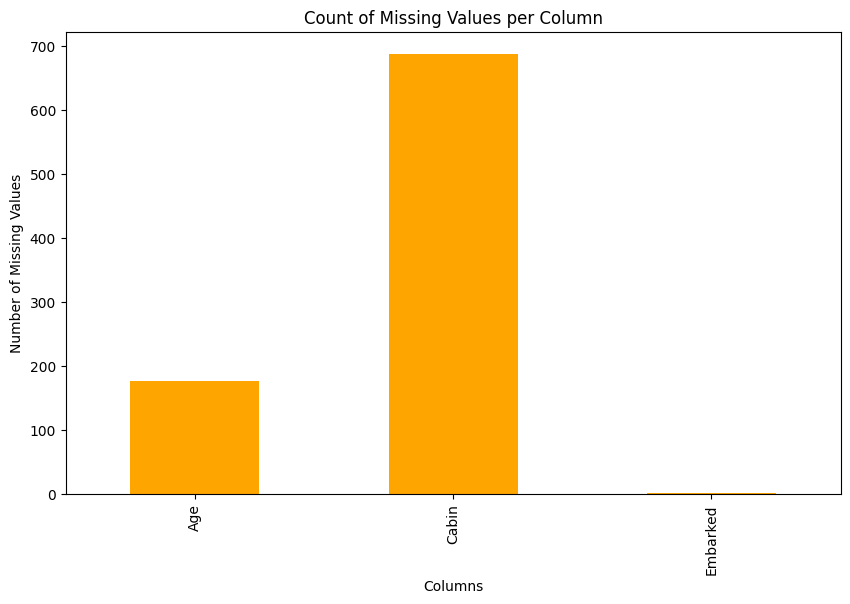

In [7]:
# Counting missing values per column
missing_counts = train_data.isnull().sum()
print("Missing Values Per Column:")
print(missing_counts)

# Visualising missing values with a bar plot
missing_counts = missing_counts[missing_counts > 0]  # Filter columns with missing data
missing_counts.plot(kind='bar', figsize=(10, 6), color="orange")
plt.title("Count of Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

**Insights from missing data** 

- Age: Approximately 19.8% of the values are missing, requiring thoughtful imputation to retain its importance in the analysis.
- Cabin: With 77% missing values, this column may need to be dropped or re-engineered.
- Embarked: the only 2 missing values can easily be replaced with the most frequently occurring value (mode) in that column, which is "S" (Southampton).

---

##### 4.1.2 Survival Distribution 

The survival rate provides a critical baseline for evaluating features influencing survival.

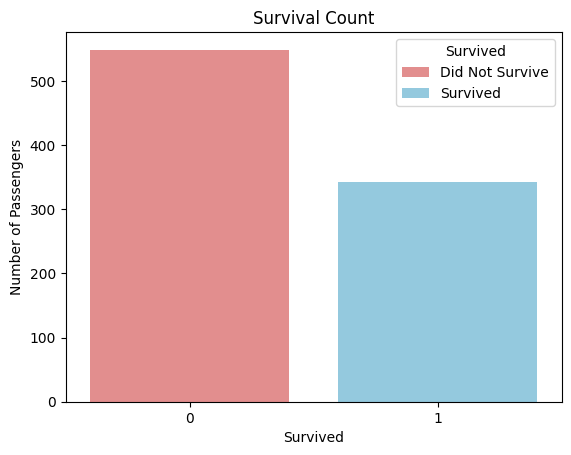

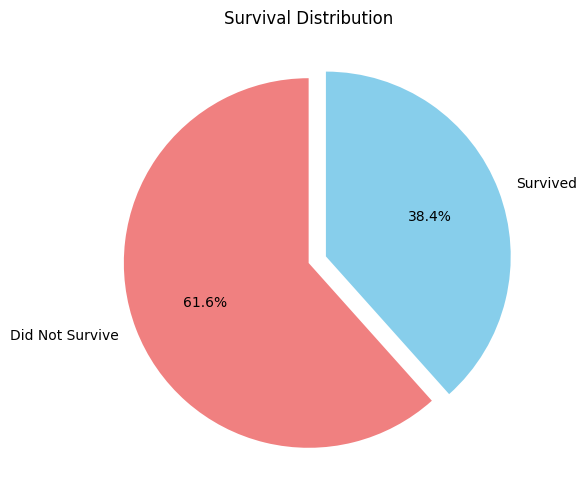

In [8]:
# Visualising survival distribution in a bar chart
sns.countplot(data=train_data, x='Survived', hue='Survived', palette={0: "lightcoral", 1: "skyblue"}, dodge=False)
plt.title("Survival Count")
plt.ylabel("Number of Passengers")
plt.xlabel("Survived")
plt.legend(title="Survived", labels=["Did Not Survive", "Survived"])
plt.show()

# Visualising survival distribution in a pie chart
# Calculate proportions for survival
survival_counts = train_data['Survived'].value_counts()
labels = ['Did Not Survive', 'Survived']
colors = ['lightcoral', 'skyblue']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
plt.title("Survival Distribution")
plt.show()

**Insights from Survival Distribution**: 

From both the bar chart and pie chart, we observe:

- Only 38.4% of passengers survived (~350 out of 891).
- The majority, around 61.6%, did not survive.

This highlights the need to investigate how various features, such as Sex, Pclass, Age, and Embarked, influenced survival rates. By analysing these features, we aim to uncover patterns that contributed to survival or fatality.

---

#### 4.2 Univariate Analysis 

Univariate analysis involves examining a single variable at a time to understand its distribution, characteristics, and patterns. This type of analysis helps identify key statistical measures like the mean, median, and variance while also detecting trends, outliers, and missing values. Visual tools such as histograms, pie charts, and box plots are commonly used for this purpose. In the context of the Titanic dataset, univariate analysis allows us to explore variables such as `Age`, `Pclass`, and `Fare` individually, providing insights into their standalone behaviour and preparing us for more complex multivariate analyses.

---

##### 4.2.1 Analysis of Categorical Features

The categorical features include `Sex`, `Pclass`, and `Embarked`. Their distribution and survival relationships are visualised below.

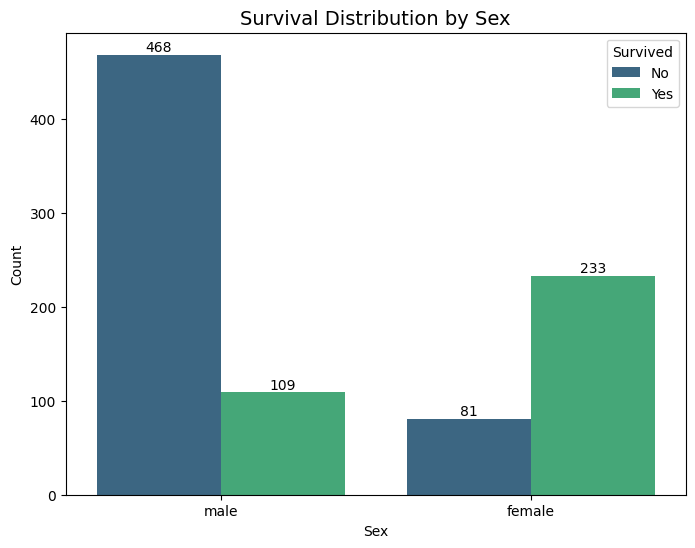

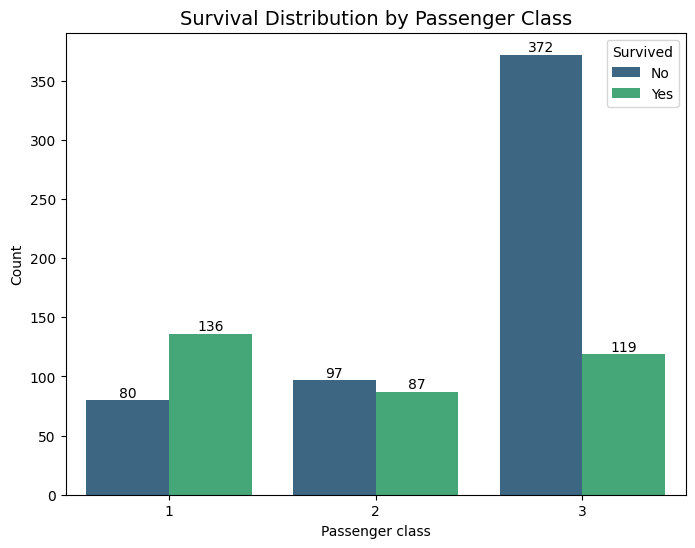

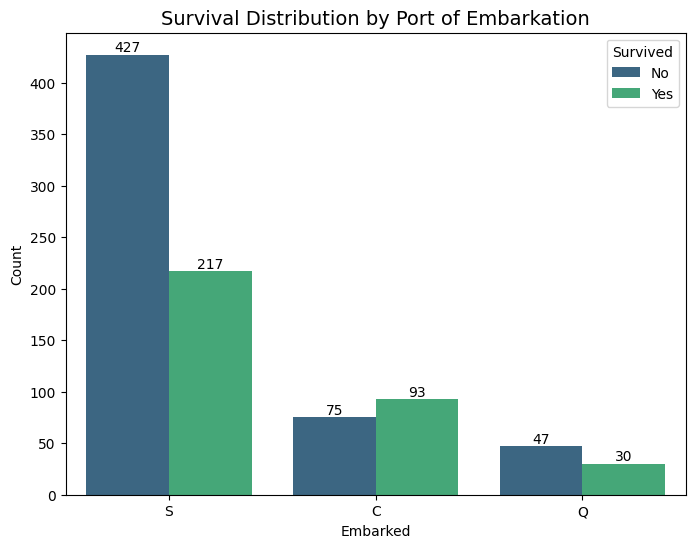

In [9]:
# Countplot for Survival by Sex
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_data, x="Sex", hue="Survived", palette="viridis")

# Add annotations
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)
plt.title("Survival Distribution by Sex", fontsize=14)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


# Countplot for Survival by Pclass
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_data, x="Pclass", hue="Survived", order=[1, 2, 3], palette="viridis")

# Add annotations
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)
plt.title("Survival Distribution by Passenger Class", fontsize=14)
plt.xlabel("Passenger class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


# Countplot for Survival by Embarked
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_data, x="Embarked", hue="Survived", palette="viridis")

# Add annotations
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)
plt.title("Survival Distribution by Port of Embarkation", fontsize=14)
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

**Insights**:
- 74% of female passengers survived, compared to only 19% of males.
- 62.9% of first-class passengers survived, while only 24.2% of third-class passengers survived.
- Passengers boarding at `C` Cherbourg had the highest survival rate (55%).

---


##### 4.2.2 Analysis of Numerical Features

The numerical features include `Age` and `Fare`. Their distributions and relationships with survival are explored below.

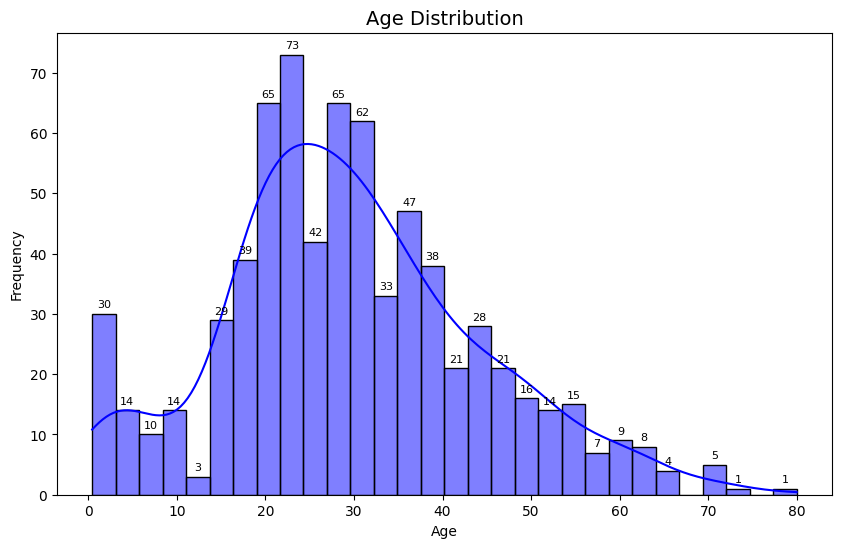

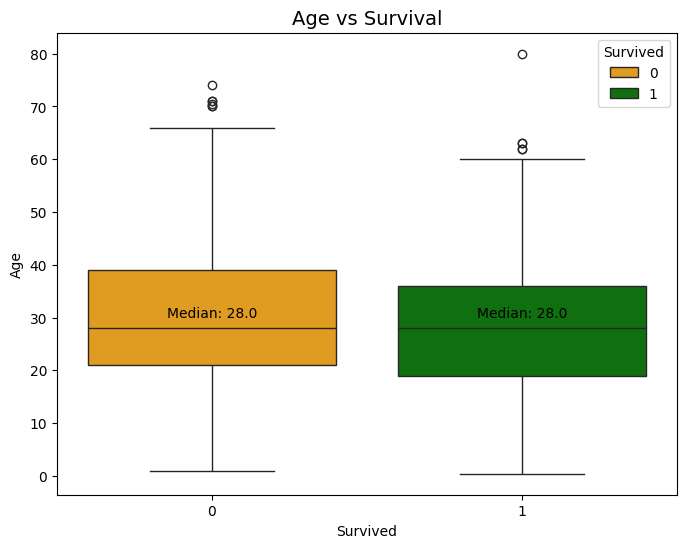

In [10]:
# Distribution of Age
plt.figure(figsize=(10, 6))
age_hist = sns.histplot(train_data["Age"].dropna(), bins=30, kde=True, color="blue")
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")

# Annotating the bars
for patch in age_hist.patches:
    height = patch.get_height()
    if height > 0:  # Avoid labels for empty bins
        plt.text(patch.get_x() + patch.get_width() / 2, height + 1, int(height), ha="center", fontsize=8)

plt.show()


# Box plot of Age vs Survival
plt.figure(figsize=(8, 6))
sns.boxplot(x="Survived", y="Age", data=train_data, hue="Survived", palette={0: "orange", 1: "green"})
plt.title("Age vs Survival", fontsize=14)
plt.xlabel("Survived")
plt.ylabel("Age")

# Adding median lines to the plot
for survival in [0, 1]:
    median_age = train_data[train_data["Survived"] == survival]["Age"].median()
    plt.text(survival, median_age + 2, f"Median: {median_age:.1f}", color="black", ha="center", fontsize=10)

plt.legend(title="Survived", loc="upper right")
plt.show()

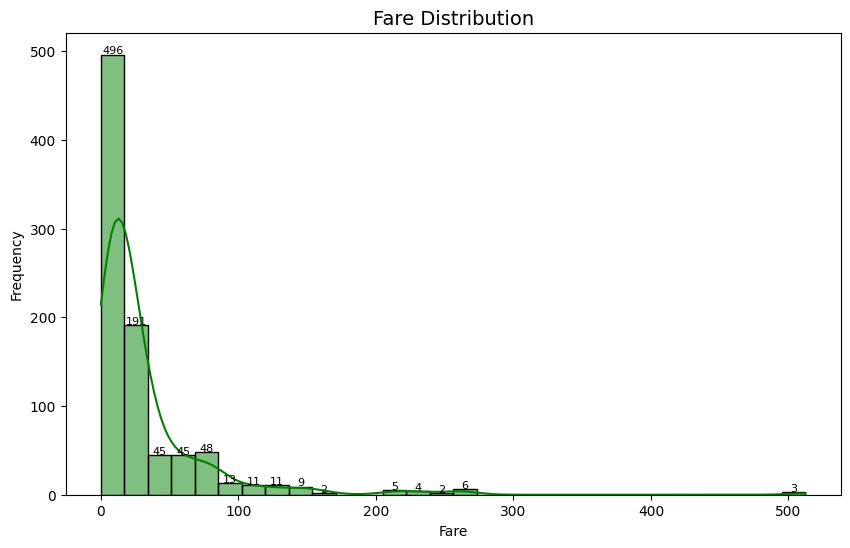

In [11]:
# Distribution of Fare
plt.figure(figsize=(10, 6))
fare_hist = sns.histplot(train_data["Fare"], bins=30, kde=True, color="green")
plt.title("Fare Distribution", fontsize=14)
plt.xlabel("Fare")
plt.ylabel("Frequency")
# Annotating the bars
for patch in fare_hist.patches:
    height = patch.get_height()
    if height > 0:  # Avoid labels for empty bins
        plt.text(patch.get_x() + patch.get_width() / 2, height + 1, int(height), ha="center", fontsize=8)

plt.show()

**Note:** The Fare distribution appears to be heavily skewed, as many passengers paid relatively low fares while a few paid extremely high fares. To address this, a log-transformed version of the histogram is included to better visualise the distribution.

**Why this matters:** Skewed features like Fare can negatively impact the performance of certain machine learning models, particularly regression-based models, as they assume normally distributed data. Log transformation reduces skewness, making the distribution more normal and improving model stability and interpretability.

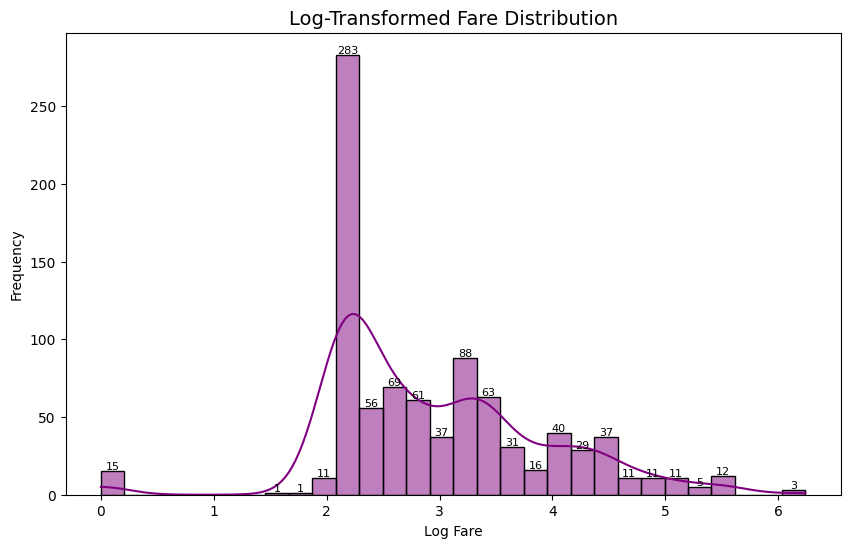

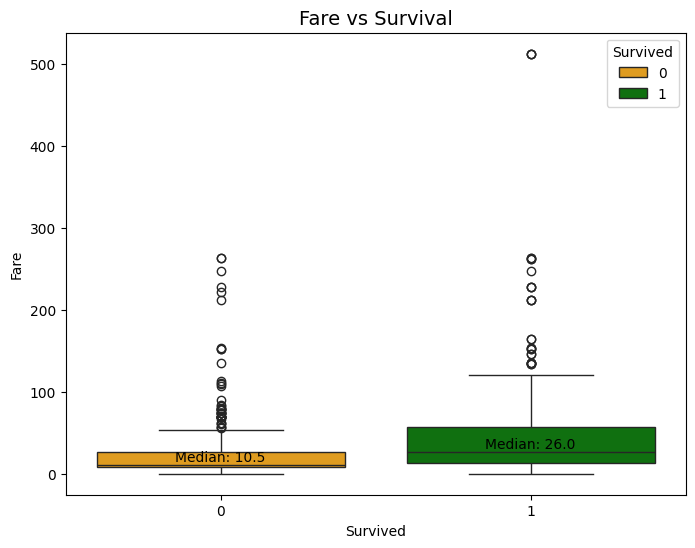

In [12]:
# Log-transformed Fare Distribution
plt.figure(figsize=(10, 6))
log_fare_hist = sns.histplot(np.log1p(train_data["Fare"]), bins=30, kde=True, color="purple")
plt.title("Log-Transformed Fare Distribution", fontsize=14)
plt.xlabel("Log Fare")
plt.ylabel("Frequency")
# Annotating the bars
for patch in log_fare_hist.patches:
    height = patch.get_height()
    if height > 0:  # Avoid labels for empty bins
        plt.text(patch.get_x() + patch.get_width() / 2, height + 1, int(height), ha="center", fontsize=8)

plt.show()


# Box plot of Fare vs Survival
plt.figure(figsize=(8, 6))
sns.boxplot(x="Survived", y="Fare", data=train_data, hue="Survived", palette={0: "orange", 1: "green"})
plt.title("Fare vs Survival", fontsize=14)
plt.xlabel("Survived")
plt.ylabel("Fare")
# Adding median annotations
for survival in [0, 1]:
    median_fare = train_data[train_data["Survived"] == survival]["Fare"].median()
    plt.text(survival, median_fare + 5, f"Median: {median_fare:.1f}", color="black", ha="center", fontsize=10)
plt.legend(title="Survived", loc="upper right")
plt.show()

**Insights**:
- Passengers aged 20-40 were most common, but children had a higher survival rate (~70%). **Note** 177 missing values in age will need to be addressed before using this feature in models.
- Passengers paying higher fares had a 62% survival rate compared to only 24% for those paying lower fares.
- The log-transformed fare distribution reveals a clearer pattern of fare variability.

---

#### 4.3 Multivariate Analysis

Multivariate analysis examines the relationships between multiple features to uncover complex patterns that influence survival. By doing this, we aim to gain deeper insights for feature engineering and model training.

---

##### 4.3.1 Survival by Sex and Passenger class
This visualization explores how survival rates vary across passenger classes `Pclass` and genders `Sex`, helping us understand the combined influence of these factors.

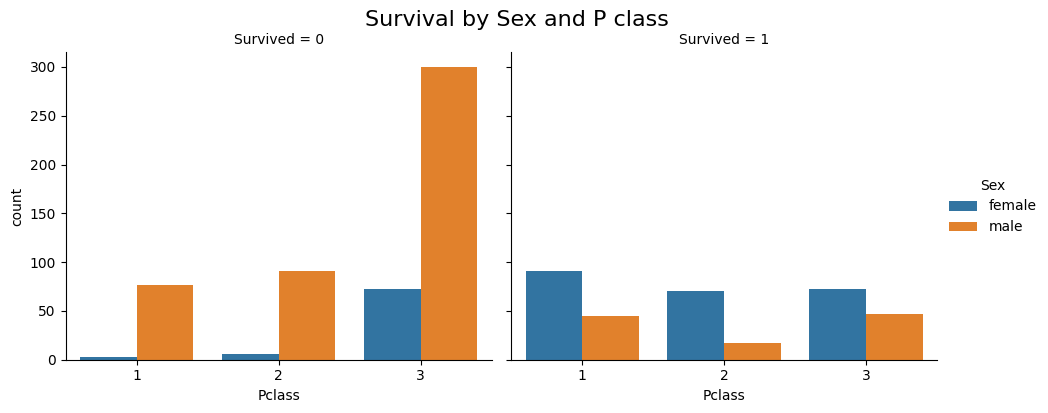

In [13]:
# Multivariate analysis: Survival by Sex and Pclass
sns.catplot(data=train_data, x="Pclass", hue="Sex", col="Survived", kind="count", height=4, aspect=1.2)
plt.suptitle("Survival by Sex and P class", y=1.02, fontsize=16)
plt.show()

**Insights:**

- Women in first and second classes had significantly higher survival rates compared to men in any class.
- Men in third class had the lowest survival rate, with a minimal proportion surviving.

---

##### 4.3.2 Survival by Age and Passenger class
The violin plot below shows the distribution of ages for survivors and non-survivors across passenger classes `Pclass`. It highlights the interaction between age, class, and survival.

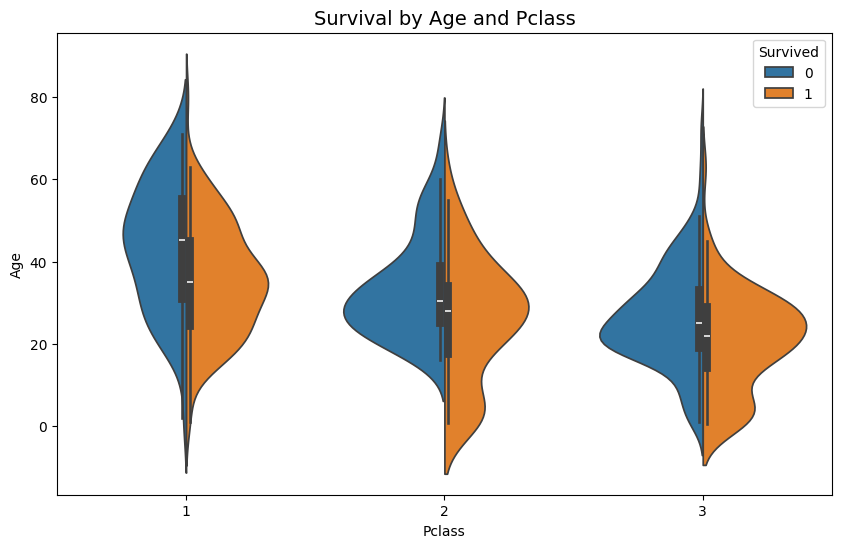

In [14]:
# Multivariate analysis: Survival by Age and Pclass
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_data, x="Pclass", y="Age", hue="Survived", split=True)
plt.title("Survival by Age and Pclass", fontsize=14)
plt.show()

**Insights:**
- Younger passengers in first class had a higher survival rate, particularly children under 10.
- Third-class passengers had a wider age range but lower survival rates across all age groups.

---

##### 4.3.3 Correlation Heatmap
The correlation heatmap shows the relationships between numerical features, helping identify multicollinearity or strong relationships that may impact model training.

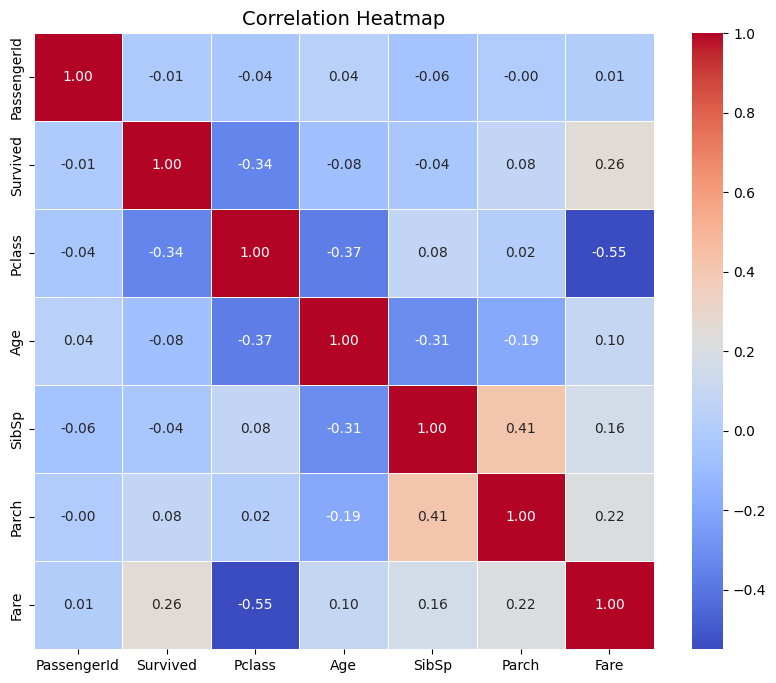

In [15]:
# Compute the correlation matrix for numeric columns
correlation_matrix = train_data.select_dtypes(include=['float64', 'int64']).corr()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


**Insights:**
- `Fare` is strongly negatively correlated with `Pclass`, as expected (higher classes paid higher fares).
- A weak positive correlation exists between `Fare` and `Survived`, indicating that passengers paying higher fares had better chances of survival.

---

##### 4.3.4 Pairwise Relationships
Pairwise relationships allow us to visualise interactions between numerical features and survival. This helps identify trends and potential outliers.

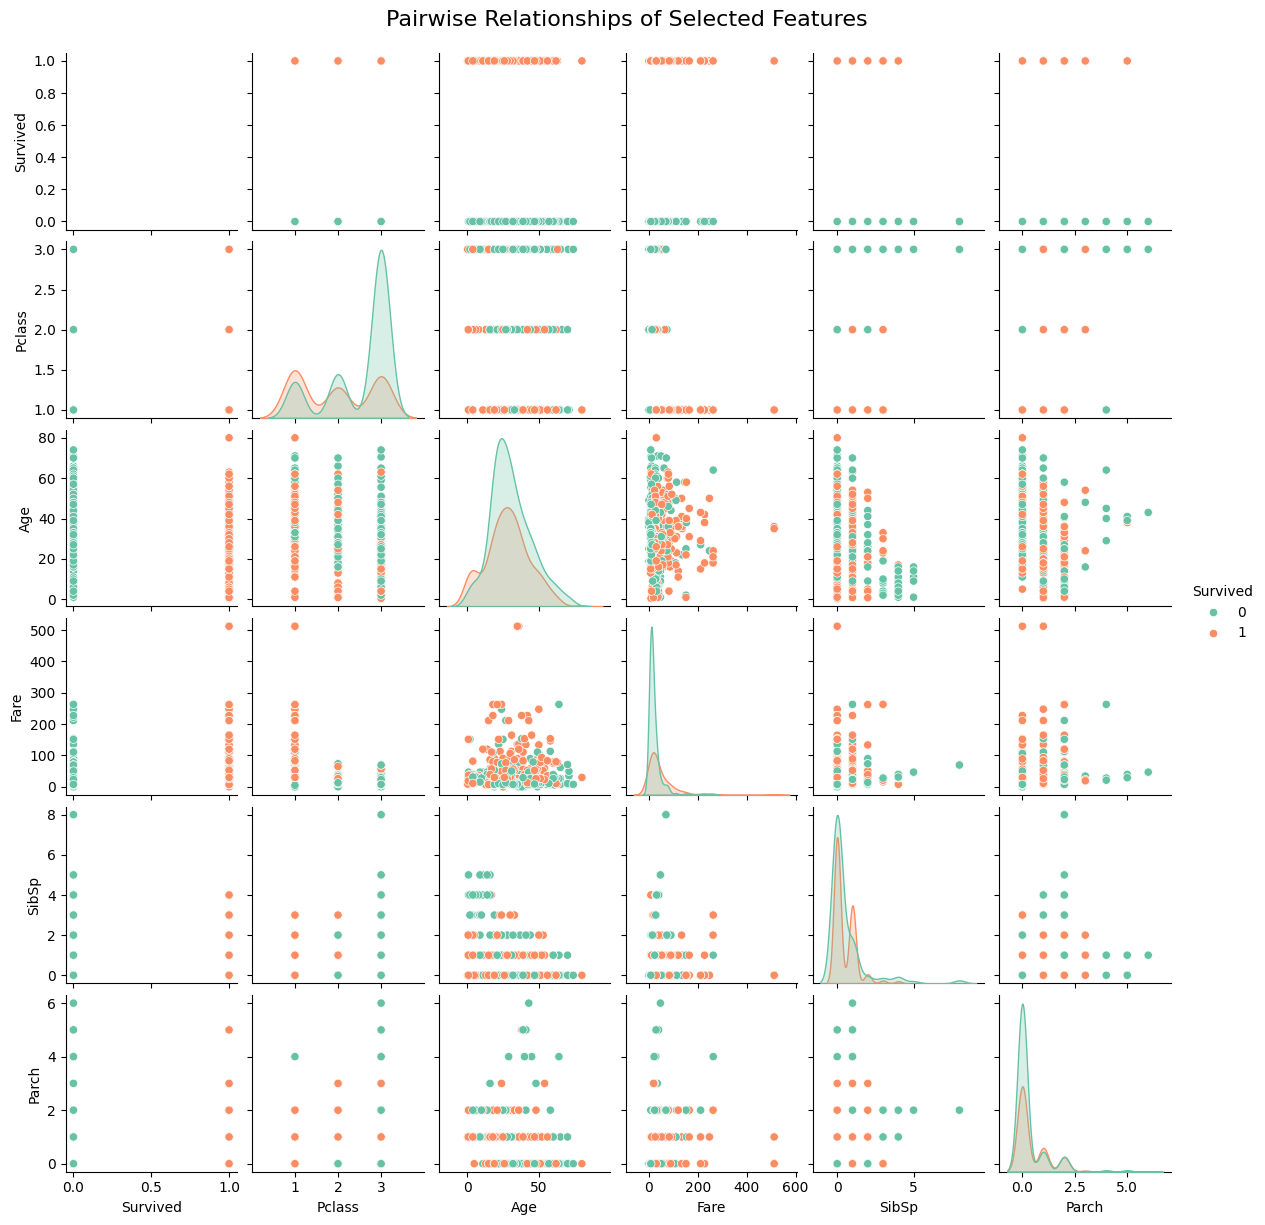

In [16]:
# Pair plot for selected features
selected_features = ["Survived", "Pclass", "Age", "Fare", "SibSp", "Parch"]
sns.pairplot(data=train_data, vars=selected_features, hue="Survived", palette="Set2", diag_kind="kde", height=2)
plt.suptitle("Pairwise Relationships of Selected Features", y=1.02, fontsize=16)
plt.show()

**Insights:**
- Passengers with smaller family sizes `(SibSp + Parch)` tended to have higher survival rates.
- Higher fares were generally associated with higher survival probabilities.
---

##### Summary of Multivariate Analysis
From the above visualisations:
- **Pclass and Sex:** Survival is higher among females and passengers in higher classes.
- **Age and Pclass:** Younger passengers and those in first or second class had better survival odds.
- **Correlation Insights:** Features like `Fare` and `Pclass` are strongly related, offering potential for feature engineering.
- **Family Size:** Passengers travelling with smaller families seem more likely to survive, suggesting a need to engineer a FamilySize feature.
---

### 5. Data cleaning and preprocessing 
--- 

This section focuses on preparing the data for machine learning by handling missing values, engineering new features, encoding categorical variables, and ensuring the dataset is in an optimal format for model training.

#### 5.1 The 4 C's of Data Cleaning

The `4 C's` of data cleaning provide a systematic approach:

1. **Correcting:** Fixing errors or inconsistencies in data values.
2. **Completing:** Addressing missing values.
3. **Creating:** Adding new features to improve model performance.
4. **Converting:** Transforming data into a suitable format

---

##### 5.1.1 Correcting 
**Goal**: Identify and fix incorrect or inconsistent data entries.

**Steps**:
1. **Correcting Entries in the `Title` Column:** Identify titles in the `Name` column and ensure that rare or inconsistent titles are standardised.
2. **Validating and Correcting `Pclass`:** Ensure `Pclass` only contains valid values `(1, 2, 3)`.
3. **Validating `Fare` and `Age`:** Check for any outliers or invalid values (e.g., negative fares or ages).

In [17]:
# Correcting: Validate and fix inconsistencies in the dataset

## Step 1: Correct Titles
print("\nUnique Titles before correction:")
print(train_data['Name'].str.extract(r' ([A-Za-z]+)\.').drop_duplicates()[0].tolist())

# Extract and standardise titles
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
title_mapping = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 
    'Countess': 'Rare', 'Lady': 'Rare', 'Sir': 'Rare',
    'Capt': 'Rare', 'Col': 'Rare', 'Don': 'Rare', 
    'Dr': 'Rare', 'Major': 'Rare', 'Rev': 'Rare', 
    'Jonkheer': 'Rare'
}
train_data['Title'] = train_data['Title'].replace(title_mapping)

print("\nUnique Titles after correction:")
print(train_data['Title'].unique())

## Step 2: Validate Pclass
print("\nUnique values in Pclass:")
print(train_data['Pclass'].unique())

# Assert all Pclass values are valid
assert train_data['Pclass'].isin([1, 2, 3]).all(), "Invalid values found in Pclass!"

## Step 3: Check for invalid Fares
invalid_fares = train_data[train_data['Fare'] < 0]
print("\nRows with invalid fares (if any):")
print(invalid_fares)

# Replace negative fares with median Fare
if not invalid_fares.empty:
    train_data.loc[train_data['Fare'] < 0, 'Fare'] = train_data['Fare'].median()

## Step 4: Check for invalid Ages
invalid_ages = train_data[train_data['Age'] < 0]
print("\nRows with invalid ages (if any):")
print(invalid_ages)

# Replace negative ages with median Age
if not invalid_ages.empty:
    train_data.loc[train_data['Age'] < 0, 'Age'] = train_data['Age'].median()

# Summary of corrections
print("\nSummary of corrections made:")
print(train_data[['Title', 'Pclass', 'Fare', 'Age']].head())




Unique Titles before correction:
['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer']

Unique Titles after correction:
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']

Unique values in Pclass:
[3 1 2]

Rows with invalid fares (if any):
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title]
Index: []

Rows with invalid ages (if any):
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title]
Index: []

Summary of corrections made:
  Title  Pclass     Fare   Age
0    Mr       3   7.2500  22.0
1   Mrs       1  71.2833  38.0
2  Miss       3   7.9250  26.0
3   Mrs       1  53.1000  35.0
4    Mr       3   8.0500  35.0


--- 
##### 5.1.2 Completing 
**Goal**: Handle missing values to ensure the dataset is complete.

**Steps:**
1. Fill missing `Embarked` values with the mode value `S`.
2. Impute missing `Age` based on `Pclass` and `Sex` median values.
3. Drop the `Cabin` column due to excessive missing values.
4. Drop other irrelevant columns like `PassengerId`, and `Ticket` as they do not contribute to modelling or are redundant after feature engineering.

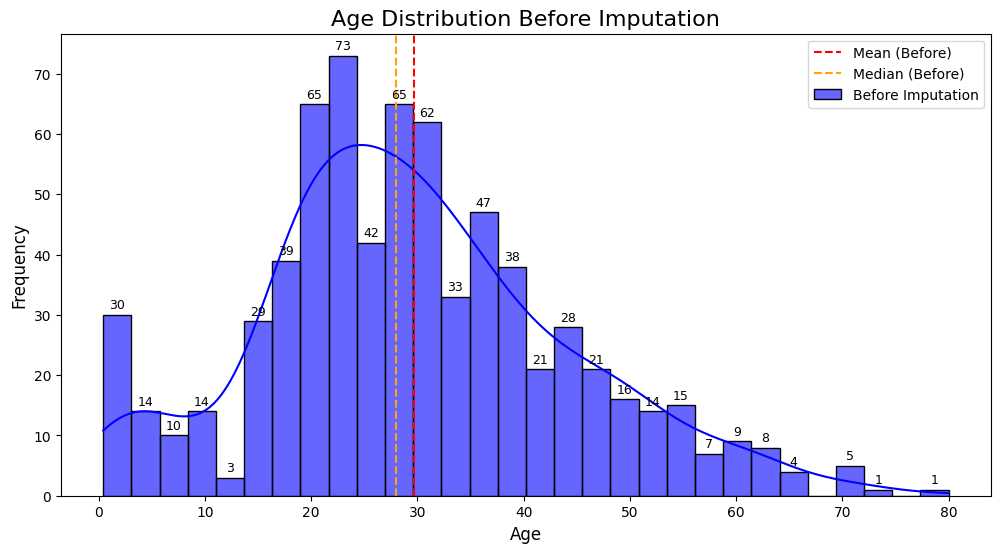

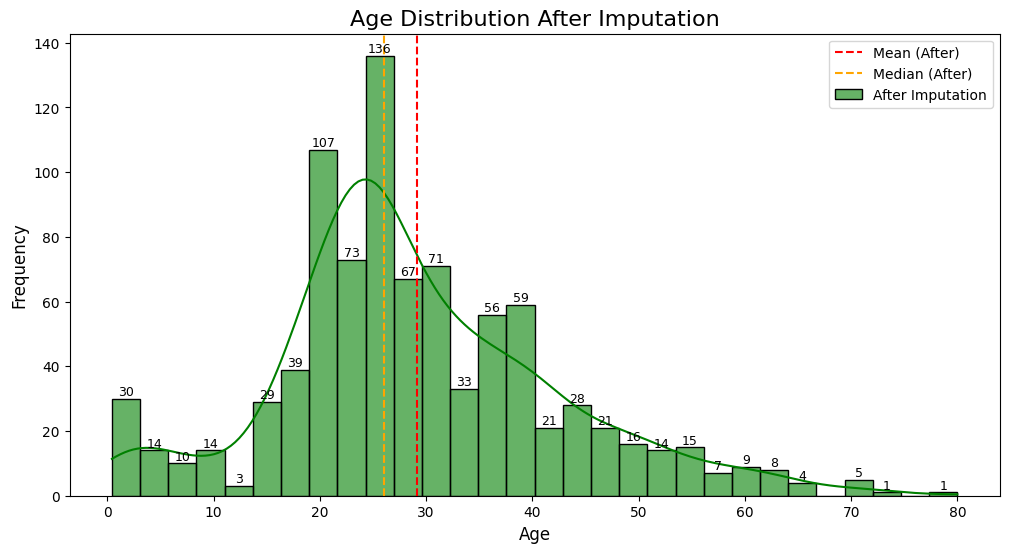

Missing values before completion:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

Missing values after completion:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64


In [18]:
# Step 1: Save a copy of the dataset before handling missing values for comparison
train_data_before_imputation = train_data.copy()

# Step 2: Visualise Age distribution before imputation
plt.figure(figsize=(12, 6))
ax = sns.histplot(train_data_before_imputation['Age'], bins=30, kde=True, color="blue", alpha=0.6, label="Before Imputation")

# Annotate the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate non-zero bars
        ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height), ha="center", fontsize=9)
        
plt.axvline(train_data_before_imputation['Age'].mean(), color='red', linestyle='--', label='Mean (Before)')
plt.axvline(train_data_before_imputation['Age'].median(), color='orange', linestyle='--', label='Median (Before)')
plt.title("Age Distribution Before Imputation", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()

# Step 3: Handle missing values
# Fill missing Embarked values with the mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Impute missing Age values with median grouped by Pclass and Sex
train_data['Age'] = train_data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Drop the Cabin column due to excessive missing values
# Drop irrelevant columns: PassengerId, Name, Ticket
train_data = train_data.drop(columns=['Cabin', 'PassengerId', 'Ticket'])

# Step 4: Visualise Age distribution after imputation
plt.figure(figsize=(12, 6))
ax = sns.histplot(train_data['Age'], bins=30, kde=True, color="green", alpha=0.6, label="After Imputation")

# Annotate the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate non-zero bars
        ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height), ha="center", fontsize=9)

plt.axvline(train_data['Age'].mean(), color='red', linestyle='--', label='Mean (After)')
plt.axvline(train_data['Age'].median(), color='orange', linestyle='--', label='Median (After)')
plt.title("Age Distribution After Imputation", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()

# Step 5: Verify missing values are handled
print("Missing values before completion:")
print(train_data_before_imputation.isnull().sum())

print("\nMissing values after completion:")
print(train_data.isnull().sum())

---
##### 5.1.3 Creating 
**Goal**: Add new features that could improve model performance.

**Example Features:**
- `FamilySize`: Combining SibSp and Parch.
- `IsAlone`: Indicates if a passenger was traveling alone.
- `Title`: Extracted from the Name column.
- Dropping `Name`: After extracting the `Title`, the `Name` column is no longer needed and is dropped to avoid redundancy.

In [19]:
# 1. Create FamilySize feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# 2. Create IsAlone feature
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)

# 3. Extract Title from Name
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with 'Rare' and standardize common ones
title_mapping = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Countess': 'Rare', 'Lady': 'Rare', 'Sir': 'Rare',
    'Capt': 'Rare', 'Col': 'Rare', 'Don': 'Rare',
    'Dr': 'Rare', 'Major': 'Rare', 'Rev': 'Rare',
    'Jonkheer': 'Rare'
}
train_data['Title'] = train_data['Title'].replace(title_mapping)

# Verify new features
print(train_data[['FamilySize', 'IsAlone', 'Title']].head())

#Drop the name column after making the title column 
train_data = train_data.drop(columns=['Name'])

   FamilySize  IsAlone Title
0           2        0    Mr
1           2        0   Mrs
2           1        1  Miss
3           2        0   Mrs
4           1        1    Mr


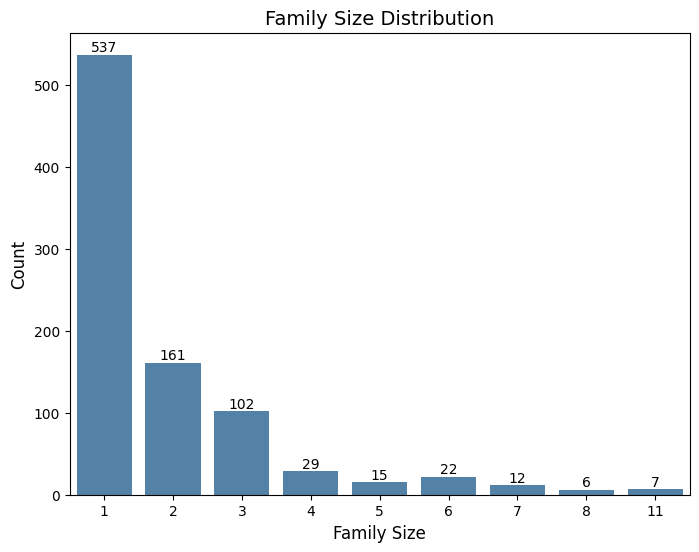

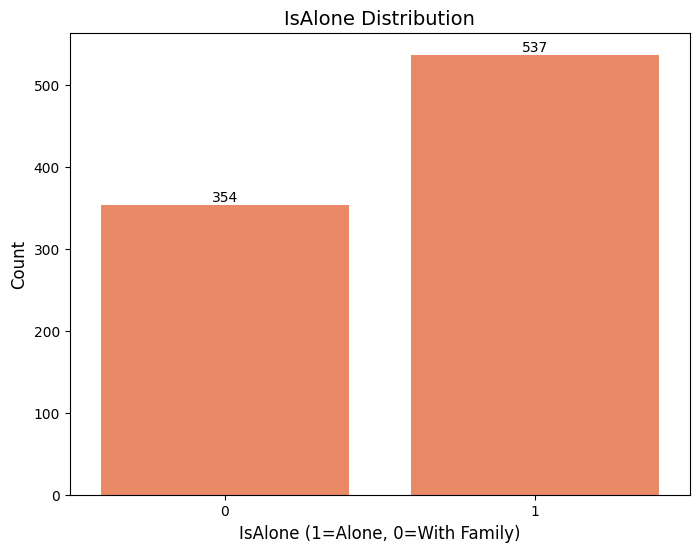

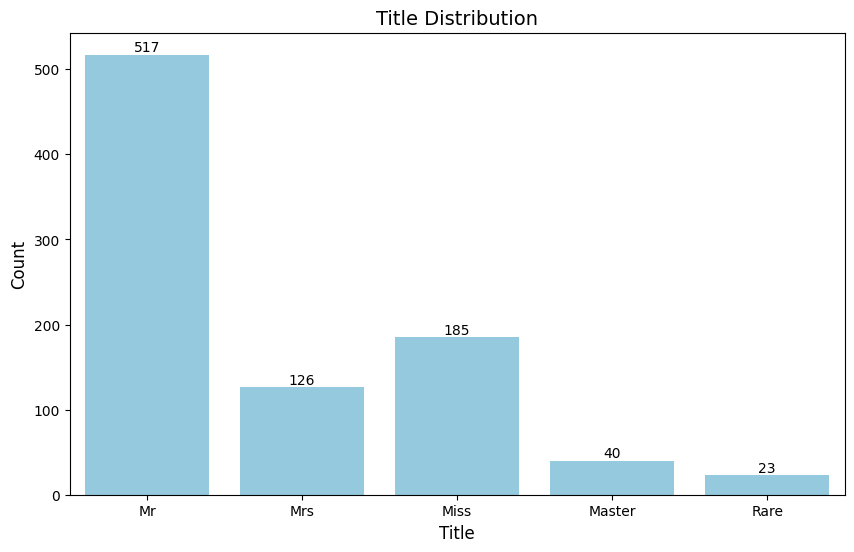

In [20]:
# Visualising FamilySize with annotations
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_data, x='FamilySize', color='steelblue')
plt.title("Family Size Distribution", fontsize=14)
plt.xlabel("Family Size", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adding annotations to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


# Visualising IsAlone with annotations
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_data, x='IsAlone', color='coral')
plt.title("IsAlone Distribution", fontsize=14)
plt.xlabel("IsAlone (1=Alone, 0=With Family)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adding annotations to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


# Visualising Title with annotations
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train_data, x='Title', color='skyblue')
plt.title("Title Distribution", fontsize=14)
plt.xlabel("Title", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adding annotations to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

---
##### 5.1.4 Converting 
**Goal**: Transform categorical variables into numerical representations to ensure they are suitable for machine learning algorithms. Categorical data like `Sex`, `Embarked`, and `Title` need to be encoded into numbers.

**Steps:**

1. **Identify categorical features:** `Sex`, `Embarked`, and `Title`.
2. **Use label encoding:** Encode the categorical features into numerical form.
3. **Verify the encoded data:** Confirm that the categorical features have been successfully converted.

Encoded values for 'Sex': [1 0]
Encoded values for 'Embarked': [2 0 1]
Encoded values for 'Title': [2 3 1 0 4]


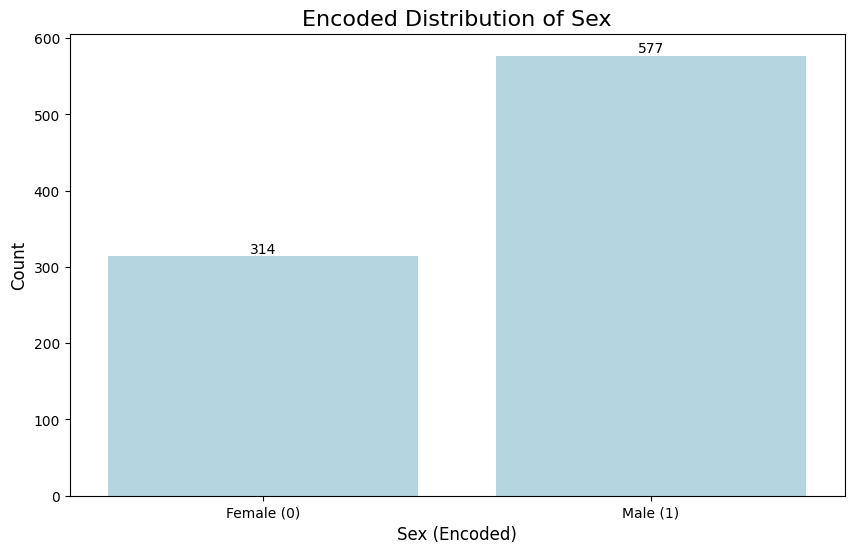

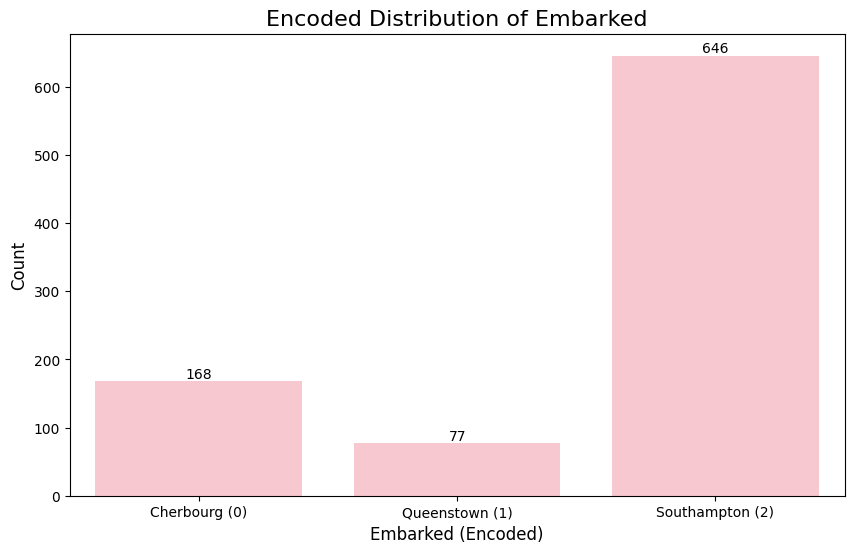

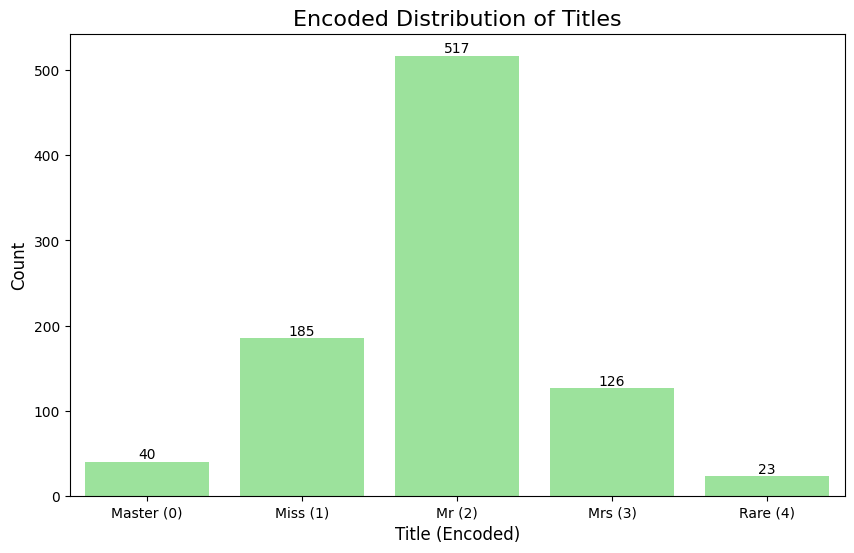

In [21]:
# Identify categorical features to encode
categorical_features = ['Sex', 'Embarked', 'Title']

# Apply label encoding to categorical features
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for feature in categorical_features:
    train_data[feature] = label_encoder.fit_transform(train_data[feature])

# Verify the encoded features
print("Encoded values for 'Sex':", train_data['Sex'].unique())
print("Encoded values for 'Embarked':", train_data['Embarked'].unique())
print("Encoded values for 'Title':", train_data['Title'].unique())


# Function to add annotations to the bars
def add_annotations(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Visualise the distribution of encoded categorical features
# Sex Feature
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train_data, x='Sex', color='lightblue')
plt.title("Encoded Distribution of Sex", fontsize=16)
plt.xlabel("Sex (Encoded)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Female (0)", "Male (1)"])  # Add custom labels for clarity
add_annotations(ax)  # Add annotations
plt.legend([], [], frameon=False)  # Remove redundant legend
plt.show()

# Embarked Feature
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train_data, x='Embarked', color='pink')
plt.title("Encoded Distribution of Embarked", fontsize=16)
plt.xlabel("Embarked (Encoded)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=["Cherbourg (0)", "Queenstown (1)", "Southampton (2)"])  # Add custom labels
add_annotations(ax)  # Add annotations
plt.legend([], [], frameon=False)  # Remove redundant legend
plt.show()

# Title Feature
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train_data, x='Title', color='lightgreen')
plt.title("Encoded Distribution of Titles", fontsize=16)
plt.xlabel("Title (Encoded)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=range(train_data['Title'].nunique()), 
           labels=["Master (0)", "Miss (1)", "Mr (2)", "Mrs (3)", "Rare (4)"])  # Add custom labels
add_annotations(ax)  # Add annotations
plt.legend([], [], frameon=False)  # Remove redundant legend
plt.show()

---
#### 5.2 Feature Engineering 
Feature engineering is critical for improving model performance by creating features that better represent the underlying patterns in the data. In this section, we introduce additional features and transformations.

**Goals:**
- `FamilySize` and `IsAlone` (already created in Section 5.1.3).
- **Interaction Terms:** Capturing the relationship between passenger class `Pclass` and `Fare`.
- **Log Transformation:** Apply log transformation to skewed features like `Fare`.

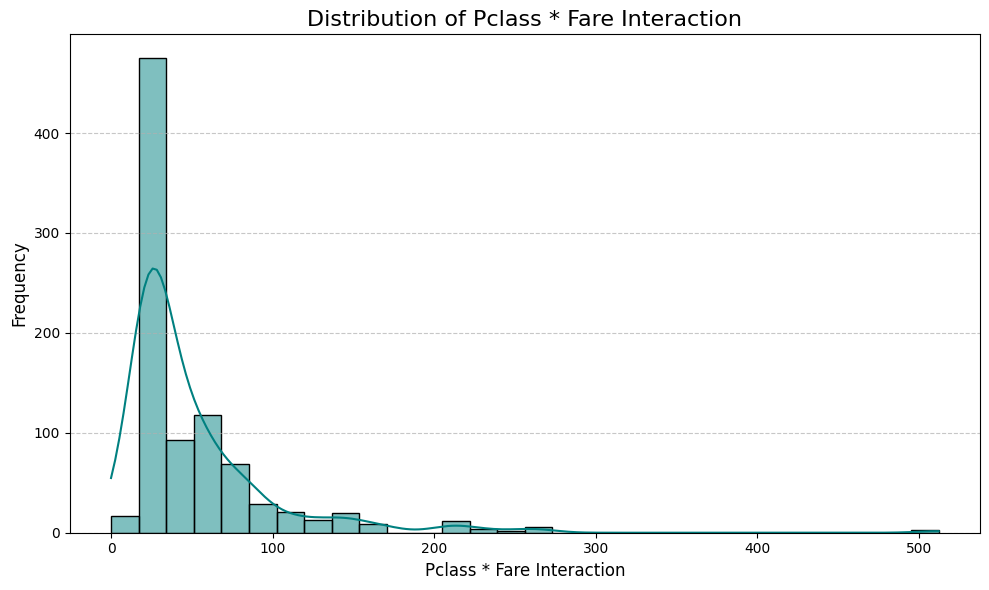

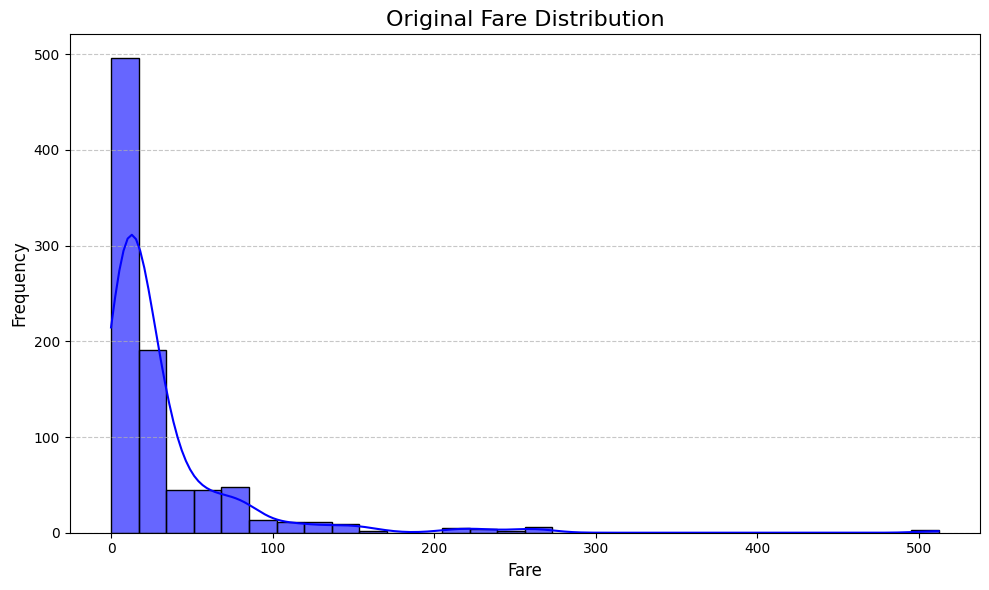

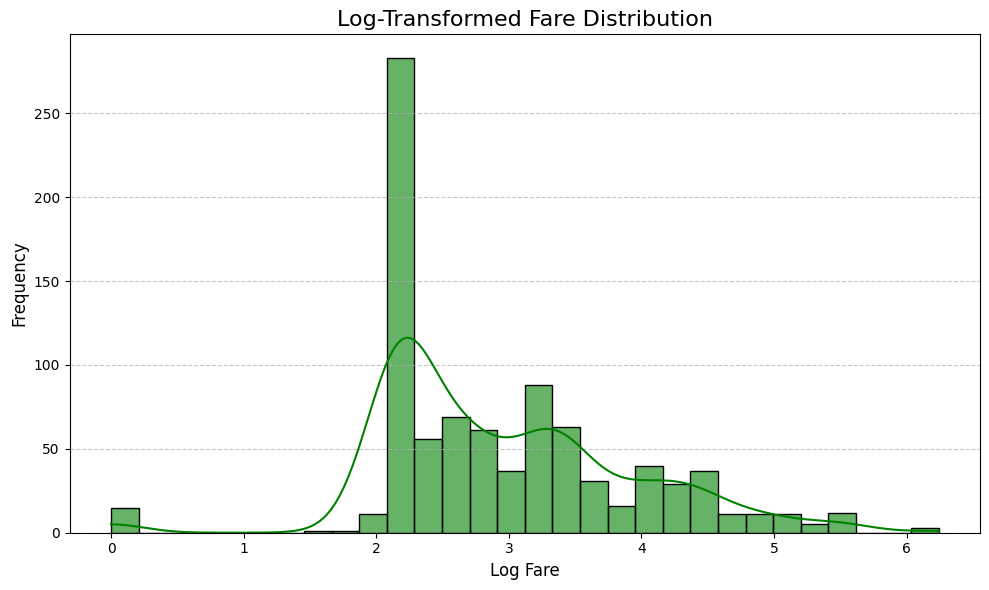

Sample of new features added:
   Pclass_Fare_Interaction   LogFare
0                  21.7500  2.110213
1                  71.2833  4.280593
2                  23.7750  2.188856
3                  53.1000  3.990834
4                  24.1500  2.202765


In [22]:
# Interaction Term: Pclass * Fare
train_data['Pclass_Fare_Interaction'] = train_data['Pclass'] * train_data['Fare']

# Plotting Pclass * Fare Interaction
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Pclass_Fare_Interaction'], kde=True, bins=30, color="teal")
plt.title("Distribution of Pclass * Fare Interaction", fontsize=16)
plt.xlabel("Pclass * Fare Interaction", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Log Transformation for Fare
train_data['LogFare'] = np.log1p(train_data['Fare'])

# Plot Original Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Fare'], kde=True, bins=30, color="blue", alpha=0.6)
plt.title("Original Fare Distribution", fontsize=16)
plt.xlabel("Fare", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Log-Transformed Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['LogFare'], kde=True, bins=30, color="green", alpha=0.6)
plt.title("Log-Transformed Fare Distribution", fontsize=16)
plt.xlabel("Log Fare", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Verify New Features
print("Sample of new features added:")
print(train_data[['Pclass_Fare_Interaction', 'LogFare']].head())

--- 
#### Summary for section 5 

In this section, we meticulously prepared the dataset for modelling by:

1. **Correcting Data Inconsistencies:** Addressed inconsistencies in features like `Title` and ensured all data entries were standardised.
2. **Handling Missing Values:** Imputed missing values for critical features like `Age` and `Embarked`, while dropping less informative features such as `Cabin`.
3. **Feature Engineering:** Created new features (`FamilySize`, `IsAlone`, `Pclass_Fare_Interaction`) and applied log transformations to skewed features like `Fare` to improve data representation and model performance.
4. **Encoding Categorical Variables:** Converted categorical features (`Sex`, `Embarked`, `Title`) into numerical formats for compatibility with machine learning algorithms.
5. **Visualisation and Validation:** Ensured transparency and interpretability of changes through data visualisations, helping verify the impact of data transformations.

This comprehensive cleaning and transformation process ensures that the dataset is now complete, consistent, and optimally structured for effective machine learning.

--- 

### 6. Model Preparation 
---

This section focuses on the final steps necessary to prepare the dataset for machine learning, building on the work completed in **Section 5**.

#### 6.1 Recap of Preprocessing

Before proceeding, we briefly recap the steps already taken:

1. **Data Cleaning:** Addressed missing values, corrected inconsistencies, and dropped irrelevant features like `Cabin`, `PassengerId`, and `Ticket`.
2. **Feature Engineering:** Created new features (`FamilySize`, `IsAlone`, `Title`, `Pclass_Fare_Interaction`, `LogFare`).
3. **Encoding:** Converted categorical features (`Sex`, `Embarked`, `Title`) into numeric values.
4. **Scaling Numerical Features:** Transformed features like `Age`, `Fare`, and `LogFare`. 

---

#### 6.2 Defining Features and Target Variable 

Here, we separate the dataset into feature variables (`X`) and the target variable (`y`).

In [23]:
# Define features (X) and target variable (y)
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']

# Verify the shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Columns in X:", X.columns)

Features shape: (891, 12)
Target shape: (891,)
Columns in X: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'FamilySize', 'IsAlone', 'Pclass_Fare_Interaction', 'LogFare'],
      dtype='object')


--- 
#### 6.3 Splitting the Dataset

In [24]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nTarget distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nTarget distribution in testing set:")
print(y_test.value_counts(normalize=True))

Training set shape: (712, 12)
Testing set shape: (179, 12)

Target distribution in training set:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Target distribution in testing set:
Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


---
### 7. Machine learning models

This section involves building machine learning models to predict passenger survival during the Titanic disaster. 

#### 7.1 Model Selection

**Goals:** The goal is to identify machine learning models suitable for predicting survival based on passenger features.

--- 

##### **Available Models:**

Below is a summary of potential models and their characteristics:

**1. Logistic Regression:** 
- A simple and interpretable linear model.
- Suitable for binary classification problems.
- Less prone to overfitting for smaller datasets.

**2. K-Nearest Neighbours (KNN):**
- Non-parametric and straightforward.
- Useful for datasets with fewer features and well-separated classes.
- Sensitive to the choice of k and scaling of features.

**3. Decision Trees:**
- Non-linear model capable of capturing complex decision boundaries.
- Easily interpretable, but prone to overfitting if not pruned.

**4. Naive Bayes:**
- Effective for categorical data and text-based features.
- Assumes feature independence, which may not always hold.

**5. Support Vector Machines (SVM):**
- Powerful for high-dimensional spaces and non-linear boundaries.
- Computationally intensive, especially for larger datasets. 

**6. Random Forest:**
- Ensemble-based model that reduces overfitting compared to decision trees.
- Suitable for datasets with many features. 

**7. Gradient Boosting (e.g., XGBoost, LightGBM):**
- Ensemble techniques that often achieve high accuracy.
- Computationally demanding but highly effective for structured data. 

---

##### **Selected Model** 

Based on the dataset characteristics and assessment requirements, the following two models were selected:

**1. Logistic Regression:** 
- Easy to implement and interpret. 
- Baseline model for comparison. 
- Highlights liner relationships in the dataset. 

**2. Random Forest:**
- Handles non-linearity and feature interactions effectively.
- Provides feature importance insights, aligning with the assessment goal of understanding key factors influencing survival.
- Robust to overfitting and well-suited for mixed data types (categorical and numerical features).


**Dataset Characteristics:**
- The Titanic dataset includes both numerical and categorical features.
- Logistic Regression ensures interpretability for initial findings.
- Random Forest excels in handling mixed data types and non-linearity.

---

#### 7.2 Training the Models

**Goal:**  Train the selected models (Logistic Regression and Random Forest) on the training dataset and prepare them for evaluation.

---

#### 7.2.1 Preprocessing the data 

**Steps:**
- Ensure numerical features are scaled to improve model performance (important for Logistic Regression).
- Use the training set (X_train, y_train) prepared in Section 6.

In [25]:
from sklearn.preprocessing import StandardScaler

# Initialise the scaler
scaler = StandardScaler()

# Apply scaling to numerical features
numerical_features = ['Age', 'Fare', 'Pclass_Fare_Interaction', 'LogFare']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Verify scaling
print("Scaled features (first 5 rows):")
print(X_train[numerical_features].head())

Scaled features (first 5 rows):
          Age      Fare  Pclass_Fare_Interaction   LogFare
692 -0.322182  0.513812                 2.358006  1.124592
481  0.053575 -0.662563                -1.020871 -3.014278
527  0.805089  3.955399                 3.400488  2.508198
855 -0.848242 -0.467874                -0.461670 -0.627019
801  0.128726 -0.115977                 0.025761  0.361872


---
#### 7.2.2 Training Logistic Regression

**Implementation:**
- Use the `LogisticRegression` class from `sklearn`.
- Fit the model to the training data.

In [26]:
from sklearn.linear_model import LogisticRegression

# Initialise the model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Print the coefficients
print("Logistic Regression Coefficients:")
print(logistic_model.coef_)

Logistic Regression Coefficients:
[[-9.59005562e-01 -2.49577371e+00 -5.07977977e-01 -2.53083398e-01
   5.60153083e-06 -3.53331764e-01 -1.65393519e-01 -1.34284389e-01
  -2.72486254e-01 -4.49360354e-01  1.85347539e-01  4.80605941e-01]]


---
#### 7.2.3 Training Random Forest

**Implementation:**
- Use the `RandomForestClassifier` class from `sklearn`.
- Fit the model to the training data.

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialise the model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
random_forest_model.fit(X_train, y_train)

# Print feature importance
print("Feature Importances:")
for feature, importance in zip(X_train.columns, random_forest_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

Feature Importances:
Pclass: 0.0591
Sex: 0.2082
Age: 0.1885
SibSp: 0.0242
Parch: 0.0167
Fare: 0.1203
Embarked: 0.0241
Title: 0.0873
FamilySize: 0.0427
IsAlone: 0.0084
Pclass_Fare_Interaction: 0.1069
LogFare: 0.1136


---
#### 7.2.4 Visualising Feature Importance 

**Goal:** Visualise the feature importances from the Random Forest model.

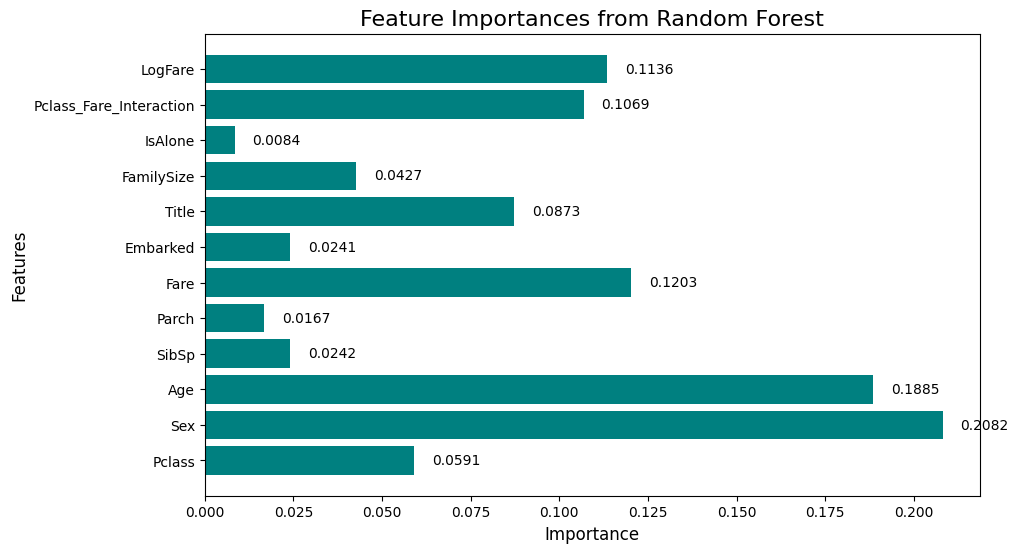

In [28]:
import matplotlib.pyplot as plt

# Plot feature importances
feature_importances = random_forest_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
bars = plt.barh(features, feature_importances, color="teal")
plt.title("Feature Importances from Random Forest", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Add annotations to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2,
             f"{width:.4f}", va="center", fontsize=10)

plt.show()

---
### 8. Model Evaluation 

This section evaluates the trained models and compares their performance.

#### 8.1 Evaluation Metrics

- **Accuracy:** Percentage of correctly predicted instances. Useful for an overall view but can be misleading for imbalanced datasets.
- **Precision:** Measures the proportion of correctly predicted positive instances.
- **Recall (Sensitivity):** Measures the proportion of actual positives that were correctly predicted.
- **F1-Score:** Harmonic mean of precision and recall, balancing both metrics.
- **ROC-AUC:** Measures the area under the Receiver Operating Characteristic curve to evaluate the trade-off between true positives and false positives.
- **MAE (Mean Absolute Error):** Average of the absolute differences between predicted and actual values.
- **RMSE (Root Mean Squared Error):** Square root of the average squared differences between predicted and actual values.
- **Confusion Matrix:** Provides detailed insights into true positives, true negatives, false positives, and false negatives.

---

#### 8.2 Evaluating Logistic Regression

Logistic Regression Performance:
Accuracy: 0.8156
Precision: 0.7903
Recall: 0.7101
F1-Score: 0.7481
ROC-AUC: 0.8528
MAE: 0.2879
RMSE: 0.3744

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



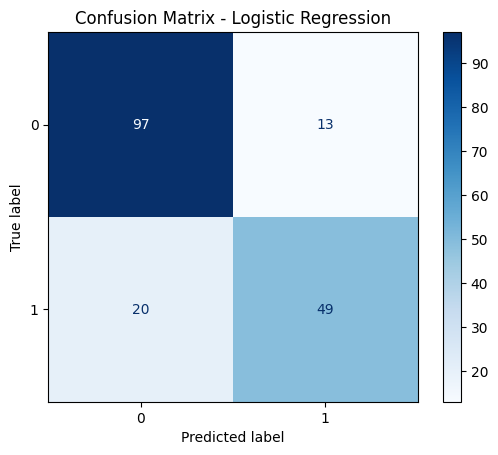

In [29]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, ConfusionMatrixDisplay, mean_absolute_error, root_mean_squared_error, roc_auc_score
)

# Generate predictions
y_pred_lr = logistic_model.predict(X_test)
y_pred_prob_lr = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
mae_lr = mean_absolute_error(y_test, y_pred_prob_lr)

# Calculate RMSE using the new `root_mean_squared_error` function
rmse_lr = root_mean_squared_error(y_test, y_pred_prob_lr)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print(f"ROC-AUC: {roc_auc_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")

# Detailed classification report
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Visualise confusion matrix
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

---
#### 8.3 Evaluating Random Forest

Random Forest Performance:
Accuracy: 0.8101
Precision: 0.7536
Recall: 0.7536
F1-Score: 0.7536
ROC-AUC: 0.8208
MAE: 0.2794
RMSE: 0.3960

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



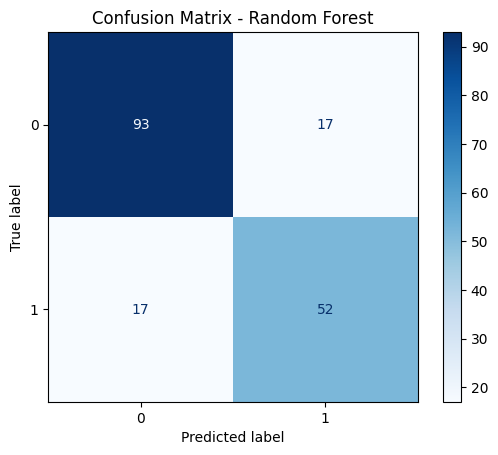

In [30]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, ConfusionMatrixDisplay, mean_absolute_error, root_mean_squared_error, roc_auc_score
)

# Generate predictions
y_pred_rf = random_forest_model.predict(X_test)
y_pred_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
mae_rf = mean_absolute_error(y_test, y_pred_prob_rf)

# Calculate RMSE using the new `root_mean_squared_error` function
rmse_rf = root_mean_squared_error(y_test, y_pred_prob_rf)

print("Random Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")

# Detailed classification report
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Visualise confusion matrix
ConfusionMatrixDisplay.from_estimator(random_forest_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

---
#### 8.4 Comparison of Models

Model Performance Comparison:
      Metric  Logistic Regression  Random Forest
0   Accuracy                81.56          81.01
1  Precision                79.03          75.36
2     Recall                71.01          75.36
3   F1-Score                74.81          75.36
4    ROC-AUC                85.28          82.08
5        MAE                28.79          27.94
6       RMSE                37.44          39.60


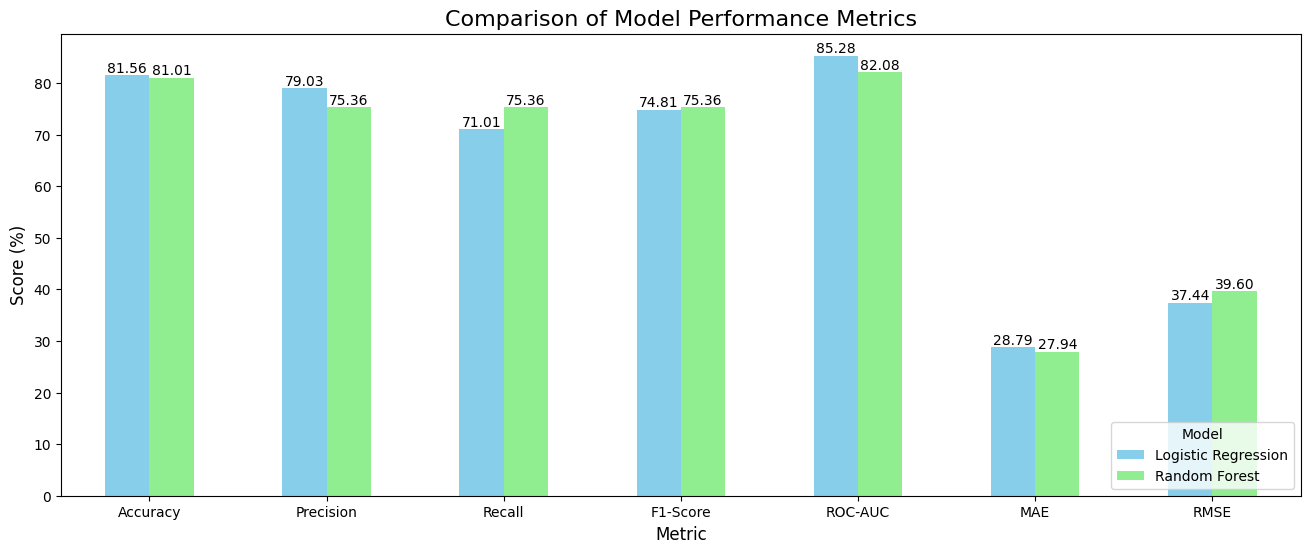

In [31]:
# Create a DataFrame to compare metrics
comparison_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC", "MAE", "RMSE"],
    "Logistic Regression": [round(accuracy_lr * 100, 2), round(precision_lr * 100, 2), round(recall_lr * 100, 2),
                            round(f1_lr * 100, 2), round(roc_auc_lr * 100, 2), round(mae_lr * 100, 2), round(rmse_lr * 100, 2)],
    "Random Forest": [round(accuracy_rf * 100, 2), round(precision_rf * 100, 2), round(recall_rf * 100, 2),
                      round(f1_rf * 100, 2), round(roc_auc_rf * 100, 2), round(mae_rf * 100, 2), round(rmse_rf * 100, 2)]
}

comparison_df = pd.DataFrame(comparison_data)

# Display the comparison
print("Model Performance Comparison:")
print(comparison_df)

# Plot the comparison
ax = comparison_df.set_index("Metric").plot(kind="bar", figsize=(16, 6), color=["skyblue", "lightgreen"])
plt.title("Comparison of Model Performance Metrics", fontsize=16)
plt.ylabel("Score (%)", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Model", loc="lower right")

# Add annotations with rounded values
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10)

plt.show()

---
#### 8.5 Visualising ROC-AUC and Precision-Recall Curve

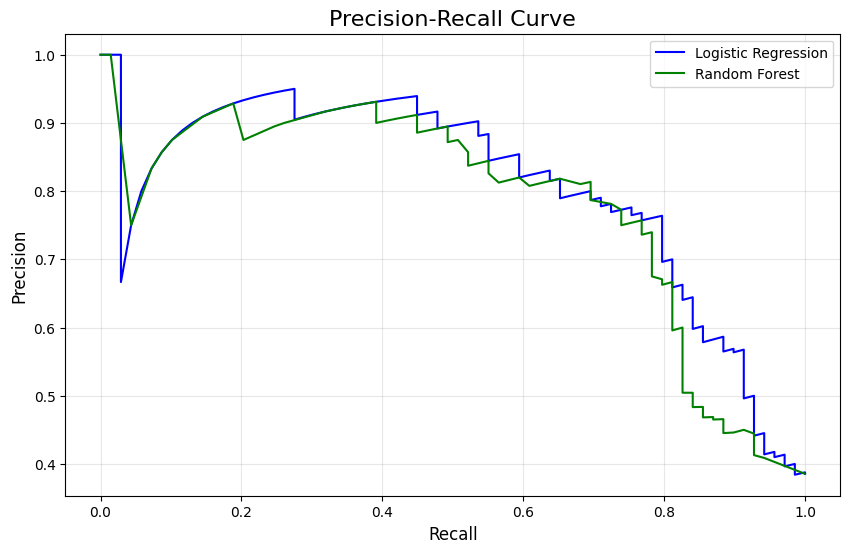

In [32]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve for Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_prob_lr)

# Precision-Recall Curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)

# Plot the Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall_lr, precision_lr, label="Logistic Regression", color="blue")
plt.plot(recall_rf, precision_rf, label="Random Forest", color="green")
plt.title("Precision-Recall Curve", fontsize=16)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.show()